In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [142]:
import os
path=(f'{os.getcwd()}/projectii')
print(path)
#/teamspace/studios/this_studio/projectii/BRCA.csv

/teamspace/studios/this_studio/projectii


In [143]:
SEED = 1

In [144]:
bcd = pd.read_csv(f'{path}/BRCA.csv')
display(bcd.head(3))

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive


In [145]:
bcd.tail(5)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop patient Id

In [146]:
bcd = bcd.drop(columns = ['Patient_ID'])

### SIZE OF OUR DATASET

In [147]:
print(f' rows (instances): {len(bcd)} \n columns (atributes): {bcd.shape[1]} \n {bcd.shape}')

 rows (instances): 341 
 columns (atributes): 15 
 (341, 15)


### EXPLORATORY DATA ANALYSIS

In [148]:
bcd.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


Let´s check wich values take the categorical features

#### Null Values

In [149]:
(bcd.isna().sum() / len(bcd) * 100).round(2)

Age                   2.05
Gender                2.05
Protein1              2.05
Protein2              2.05
Protein3              2.05
Protein4              2.05
Tumour_Stage          2.05
Histology             2.05
ER status             2.05
PR status             2.05
HER2 status           2.05
Surgery_type          2.05
Date_of_Surgery       2.05
Date_of_Last_Visit    7.04
Patient_Status        5.87
dtype: float64

### Delete Nulls

In [150]:
bcd['Patient_Status'].value_counts()

Patient_Status
Alive    255
Dead      66
Name: count, dtype: int64

In [151]:
bcd = bcd.dropna()

In [152]:
bcd['Patient_Status'].value_counts()

Patient_Status
Alive    255
Dead      62
Name: count, dtype: int64

### Categorical Variables

In [153]:
for i in bcd.columns:
    if not bcd[i].dtype == ('float' or 'int'):
        print(f'Num of unique values in {i}:  {len(bcd[i].unique())}  \n  {bcd[i].unique()}\n' if len(bcd[i].unique())<10 else f'Num of unique values in {i}:  {len(bcd[i].unique())}  \n' )

Num of unique values in Gender:  2  
  ['FEMALE' 'MALE']

Num of unique values in Tumour_Stage:  3  
  ['III' 'II' 'I']

Num of unique values in Histology:  3  
  ['Infiltrating Ductal Carcinoma' 'Mucinous Carcinoma'
 'Infiltrating Lobular Carcinoma']

Num of unique values in ER status:  1  
  ['Positive']

Num of unique values in PR status:  1  
  ['Positive']

Num of unique values in HER2 status:  2  
  ['Negative' 'Positive']

Num of unique values in Surgery_type:  4  
  ['Modified Radical Mastectomy' 'Lumpectomy' 'Other' 'Simple Mastectomy']

Num of unique values in Date_of_Surgery:  178  

Num of unique values in Date_of_Last_Visit:  285  

Num of unique values in Patient_Status:  2  
  ['Alive' 'Dead']



In [154]:
bcd = bcd.drop(columns = ['ER status','PR status'])

### Distributions

#### Distribution of numerical variables
Age, Protein1, Protein2, Protein3, Protein4

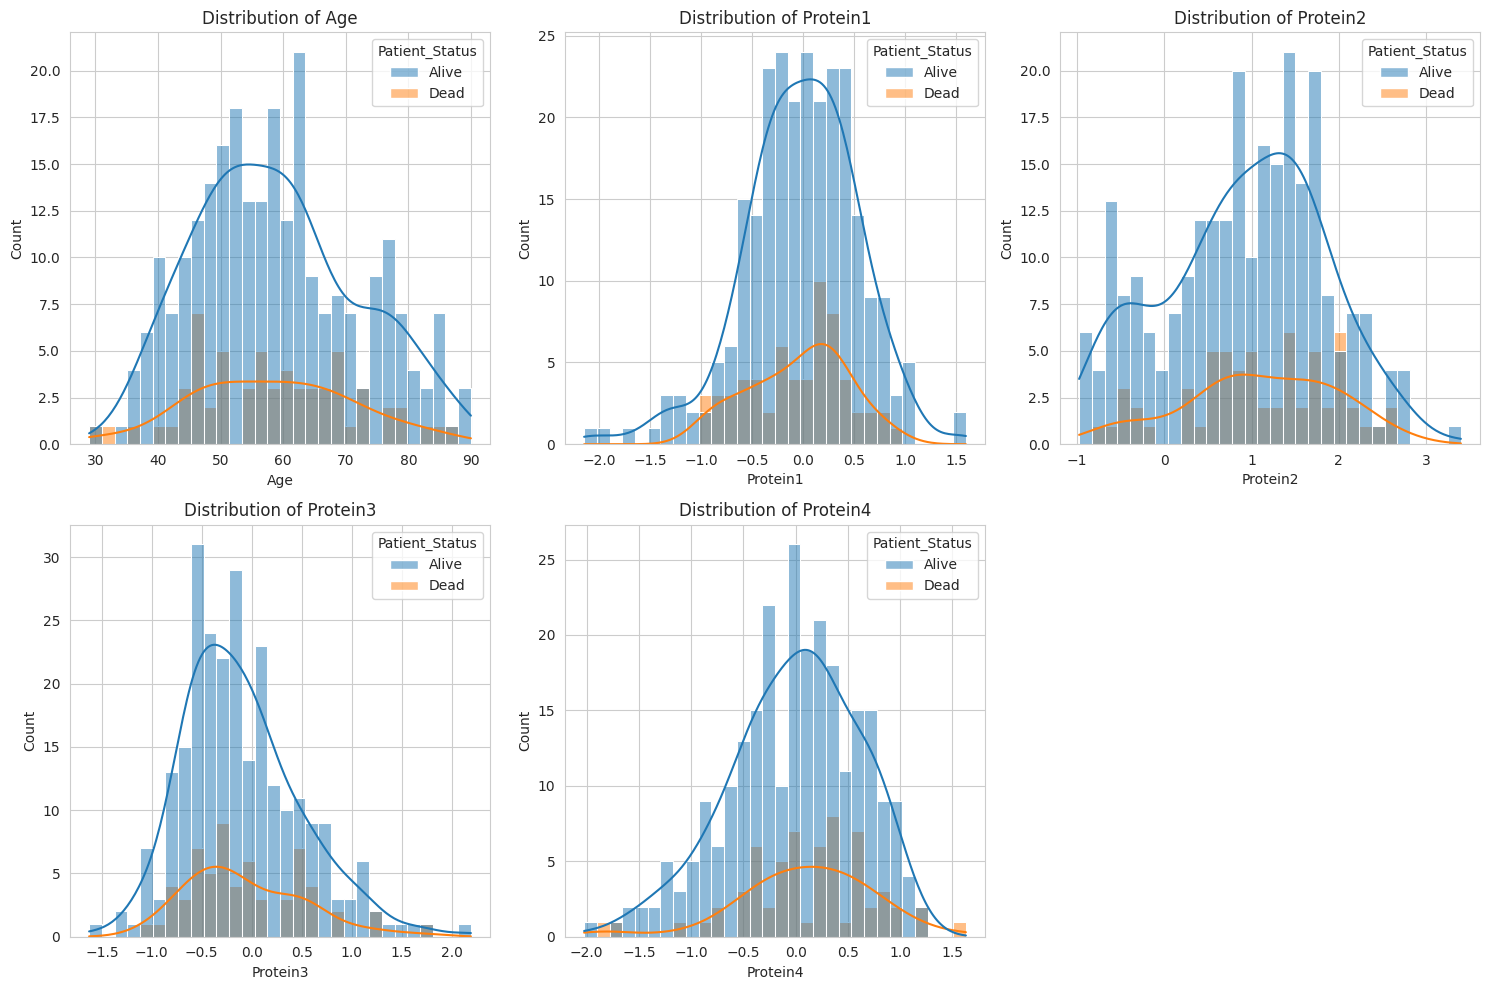

In [155]:
num_columns = ['Age','Protein1','Protein2','Protein3','Protein4']

# plotting distributions of numerical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(num_columns,1):
    plt.subplot(2, 3, i)
    sns.histplot(bcd, x=column, bins=30,kde=True, hue='Patient_Status')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

#### Distribution of categorical variable

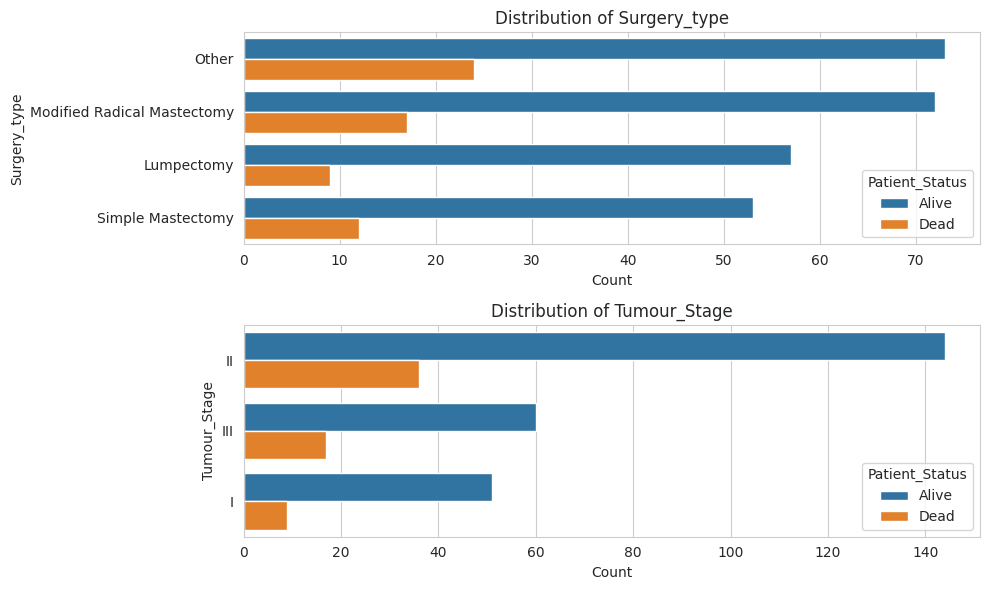

In [156]:
# selecting some relevant categorical columns for analysis
categorical_columns = ['Surgery_type', 'Tumour_Stage']

# plotting distributions of categorical features
plt.figure(figsize=(10, 6))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 1, i)
    sns.countplot(y=column, data=bcd, order = bcd[column].value_counts().index ,hue='Patient_Status')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

([<matplotlib.patches.Wedge at 0x7f32f0d8f100>,
 [Text(-0.043594306004584374, -1.099135813484384, 'FEMALE'),
  Text(0.04359432851582402, 1.0991358125915354, 'MALE')],
 [Text(-0.023778712366136927, -0.5995286255369368, '98.7%'),
  Text(0.023778724644994916, 0.5995286250499283, '1.3%')])

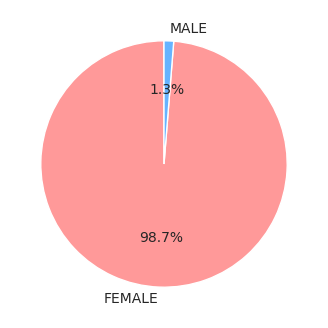

In [157]:
# gender Distribution
gender_counts = bcd['Gender'].value_counts()

# gender distribution plot
plt.figure(figsize=(6,4))
plt.pie(gender_counts, labels= bcd['Gender'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])

#### Distribution of Target variable

In [158]:
bcd['Patient_Status'].value_counts()

Patient_Status
Alive    255
Dead      62
Name: count, dtype: int64

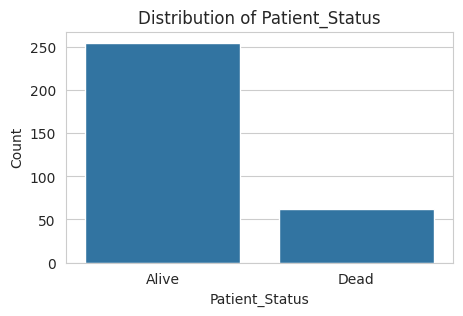

In [159]:

sns.set_style("whitegrid")

# plot the distribution of the target variable 'claim_status'
plt.figure(figsize=(5, 3))
sns.countplot(x='Patient_Status', data=bcd)

plt.title('Distribution of Patient_Status')
plt.xlabel('Patient_Status')
plt.ylabel('Count')
plt.show()

### DATA TRANSFORMATIONS / PREPROCESSING

Balancing the database

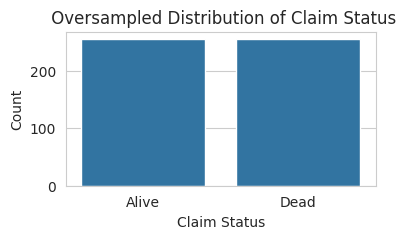

In [160]:
from sklearn.utils import resample

# separate majority and minority classes
majority = bcd[bcd['Patient_Status'] == 'Alive']
minority = bcd[bcd['Patient_Status'] == 'Dead']

# oversample the minority class
minority_oversampled = resample(minority,
                                replace=True,
                                n_samples=len(majority),
                                random_state=SEED)

# combine majority class with oversampled minority class
oversampled_data = pd.concat([majority, minority_oversampled])

# check the distribution of undersampled and oversampled datasets
oversampled_distribution = oversampled_data['Patient_Status'].value_counts()

plt.figure(figsize=(4,2 ))
sns.countplot(x='Patient_Status', data=oversampled_data)
plt.title(' Oversampled Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

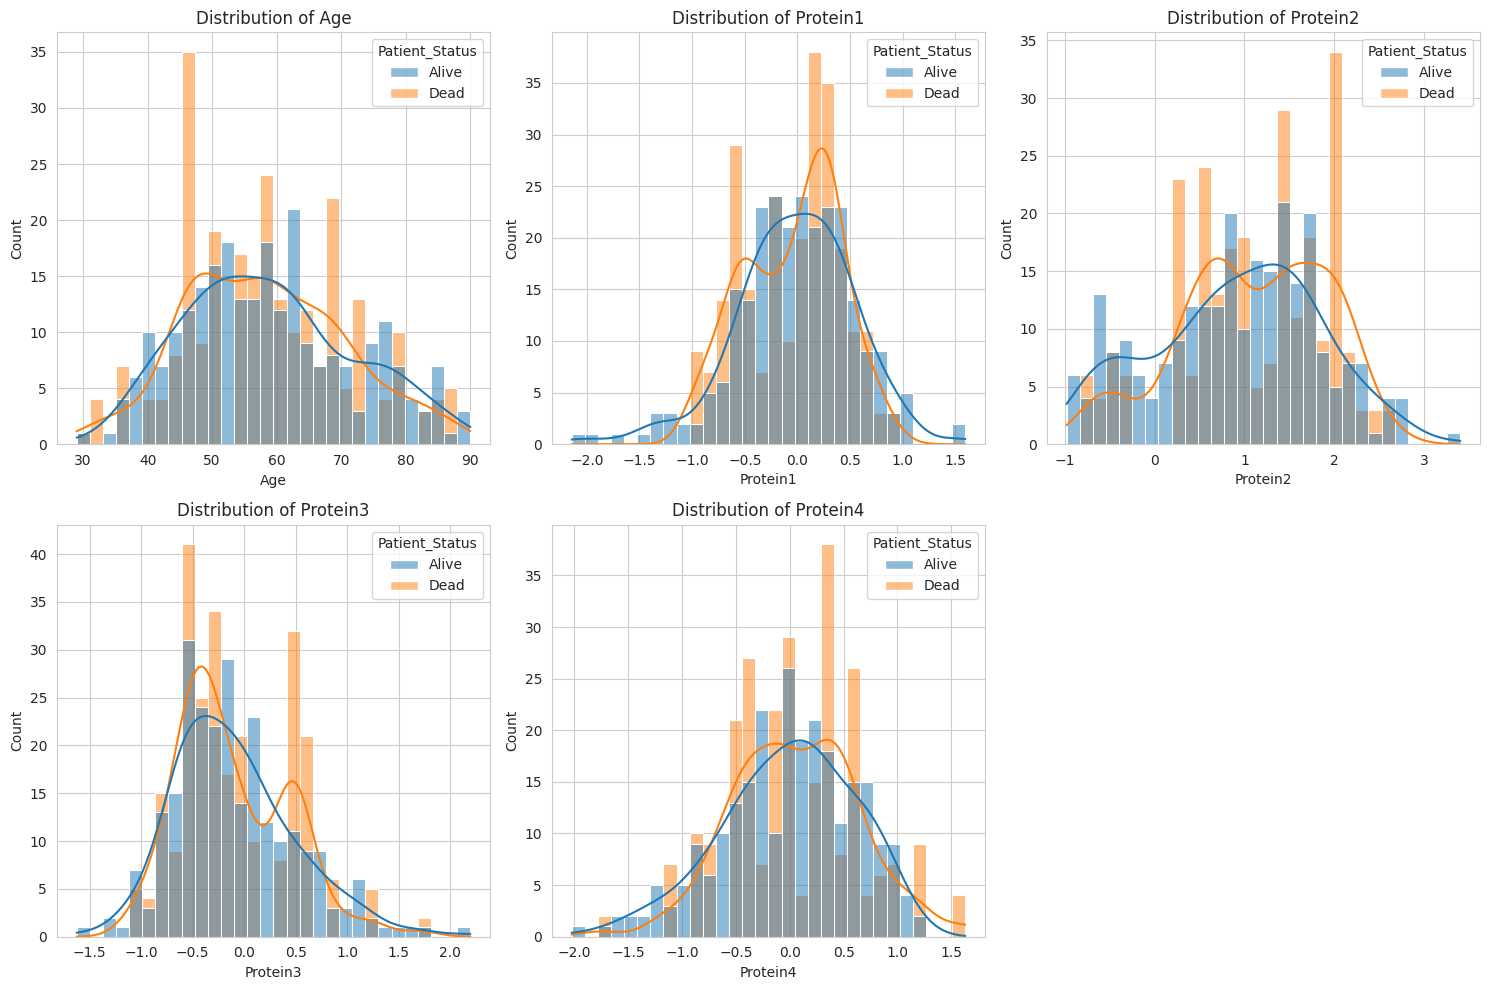

In [161]:
num_columns = ['Age','Protein1','Protein2','Protein3','Protein4']

# plotting distributions of numerical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(num_columns,1):
    plt.subplot(2, 3, i)
    sns.histplot(oversampled_data, x=column, bins=30,kde=True, hue='Patient_Status')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

### DATA TRANSFORMATION

In [162]:

oversampled_data["Tumour_Stage"] = oversampled_data["Tumour_Stage"].map({"I": 1, "II": 2, "III": 3})
oversampled_data["Histology"] = oversampled_data["Histology"].map({"Infiltrating Ductal Carcinoma": 1, 
                                           "Infiltrating Lobular Carcinoma": 2, "Mucinous Carcinoma": 3})
oversampled_data["HER2 status"] = oversampled_data["HER2 status"].map({"Positive": 1, "Negative": 2})
oversampled_data["Gender"] = oversampled_data["Gender"].map({"MALE": 0, "FEMALE": 1})
oversampled_data["Surgery_type"] = oversampled_data["Surgery_type"].map({"Other": 1, "Modified Radical Mastectomy": 2, 
                                                 "Lumpectomy": 3, "Simple Mastectomy": 4})

### BREAST CANCER MODEL

In [163]:
bcd["Tumour_Stage"] = bcd["Tumour_Stage"].map({"I": 1, "II": 2, "III": 3})
bcd["Histology"] = bcd["Histology"].map({"Infiltrating Ductal Carcinoma": 1, 
                                           "Infiltrating Lobular Carcinoma": 2, "Mucinous Carcinoma": 3})
bcd["HER2 status"] = bcd["HER2 status"].map({"Positive": 1, "Negative": 2})
bcd["Gender"] = bcd["Gender"].map({"MALE": 0, "FEMALE": 1})
bcd["Surgery_type"] = bcd["Surgery_type"].map({"Other": 1, "Modified Radical Mastectomy": 2, 
                                                 "Lumpectomy": 3, "Simple Mastectomy": 4})


----------------------------------------------------------------

In [164]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

x = np.array(bcd[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 
                   'Tumour_Stage', 'Histology', 
                   'HER2 status', 'Surgery_type']])

y = np.array(bcd[['Patient_Status']])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)  # 70% training and 30% test



In [165]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [166]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


#I don´t know if the recall and precision are correct

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average="binary", pos_label="Alive"))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,  average="binary", pos_label="Alive"))

Accuracy: 0.8333333333333334
Precision: 0.8333333333333334
Recall: 1.0


In [167]:
clf.score(X_test,y_test)

0.8333333333333334

In [168]:
# Prediction
# features = [['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']]
features = np.array([[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1,  2, 2,]])
print(clf.predict(features))

['Alive']


------------------------------------------

In [169]:
# Splitting data
x = np.array(oversampled_data[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 
                   'Tumour_Stage', 'Histology', 
                   'HER2 status', 'Surgery_type']])
y = np.array(oversampled_data[['Patient_Status']])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=42)

In [170]:
#Create a svm Classifier
clf2 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf2.fit(xtrain, ytrain)

#Predict the response for test dataset
y_pred2 = clf2.predict(xtest)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [171]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest, y_pred2))

Accuracy: 0.5294117647058824


In [172]:
# Prediction
# features = [['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']]
features = np.array([[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 2, 2,]])
print(clf2.predict(features))

['Dead']


-----------------------------------------------------------------------------------------------------------------

#### Cross-Validation

In [173]:
from sklearn.model_selection import cross_val_score
from IPython.display import clear_output

x = np.array(bcd[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 
                   'Tumour_Stage', 'Histology', 
                   'HER2 status', 'Surgery_type']])
                   
y = np.array(bcd[['Patient_Status']])

scores = cross_val_score(clf, x, y, cv=10)
clear_output(wait=True)
print(scores.mean())

0.8044354838709677


In [174]:
from sklearn.model_selection import cross_val_score
from IPython.display import clear_output

x = np.array(oversampled_data[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 
                   'Tumour_Stage', 'Histology', 
                   'HER2 status', 'Surgery_type']])
                   
y = np.array(oversampled_data[['Patient_Status']])

scores = cross_val_score(clf2, x, y, cv=10)
clear_output(wait=True)
print(scores.mean())

0.5588235294117647


------------------------------------------------------

In [175]:
svc = svm.SVC()
para_grid = {
'C': [0.1,1,10,100],
'kernel':['linear','poly','rbf'],
'gamma':['scale','auto']

}

In [176]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

cv_strategy = StratifiedKFold(n_splits = 3)

grid_search = GridSearchCV(svc,para_grid,cv=cv_strategy,scoring='accuracy')
grid_search.fit(x,y)

print(f'best pharam: {grid_search.best_params_}')

### XBOOST

In [177]:
bcd["Patient_Status"] = bcd["Patient_Status"].map({"Alive": 0, "Dead": 1})

x = np.array(bcd[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 
                   'Tumour_Stage', 'Histology', 
                   'HER2 status', 'Surgery_type']])
y = np.array(bcd[['Patient_Status']])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [178]:
import xgboost as xgb

# Create regression matrices
train = xgb.DMatrix(X_train,label= y_train)
test = xgb.DMatrix(X_test,label= y_test)

In [179]:
params = {"max_depth": 4,
            'eta':0.3,
            'num_class':1,
            "objective": "reg:squarederror"
        }
epoch = 10


In [180]:
model = xgb.train(params,train,epoch)

predictions = model.predict(test)

predictions=predictions.round()

In [181]:
accuracy_score(y_test,predictions)

0.7604166666666666

-------------------------------------------

In [182]:
oversampled_data["Patient_Status"] = oversampled_data["Patient_Status"].map({"Alive": 0, "Dead": 1})

In [188]:


x = np.array(oversampled_data[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 
                   'Tumour_Stage', 'Histology', 
                   'HER2 status', 'Surgery_type']])
y = np.array(oversampled_data[['Patient_Status']])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)

In [189]:
import xgboost as xgb

# Create regression matrices
train = xgb.DMatrix(X_train,label= y_train)
test = xgb.DMatrix(X_test,label= y_test)

In [190]:
params = {"max_depth": 4,
            'eta':0.3,
            'num_class':1,
            "objective": "reg:squarederror"
        }
epoch = 10


In [191]:
model = xgb.train(params,train,epoch)

predictions = model.predict(test)

predictions=predictions.round()

In [192]:
accuracy_score(y_test,predictions)

0.7990196078431373